<a href="https://colab.research.google.com/github/svsnehjal/DSP-PROJECT/blob/main/SNEHJAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your Excel file (e.g., IFSA.xlsx)


Saving IFSA.xlsx to IFSA (3).xlsx
Dataset Loaded Successfully!

Data Preview:
   donation_id food_type  quantity donor_location    receiving_NGO  \
0            1    Snacks        38        Kolkata      Annakshetra   
1            2       Dal        28         Mumbai        Roti Bank   
2            3    Sweets        41        Kolkata  Robin Hood Army   
3            4       Dal        75        Kolkata    Feeding India   
4            5      Rice        43        Chennai  Robin Hood Army   

          pickup_time       delivery_time delivery_status  
0 2024-06-01 09:49:00 2024-06-01 19:49:00   Not Delivered  
1 2024-02-29 04:22:00 2024-02-29 08:22:00       Delivered  
2 2024-02-04 09:42:00 2024-02-04 11:42:00       Delivered  
3 2024-02-16 04:36:00 2024-02-16 06:36:00       Delivered  
4 2024-04-15 13:23:00 2024-04-15 21:23:00   Not Delivered  


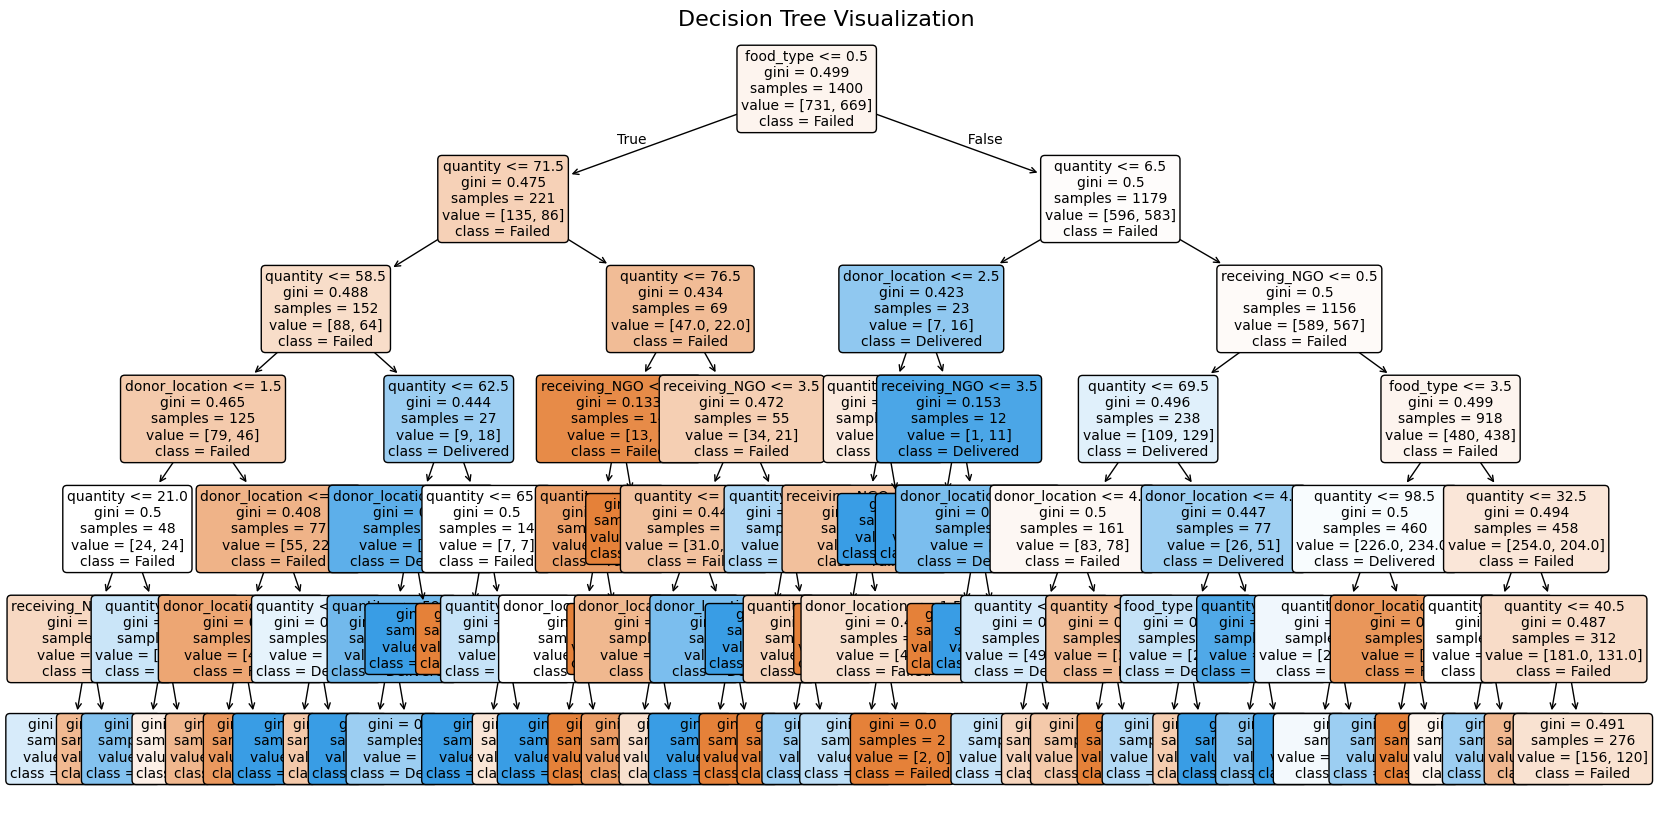


 Model Comparison:
Decision Tree Accuracy: 0.497
Random Forest Accuracy: 0.487
XGBoost Accuracy: 0.530

 Best Model: XGBoost



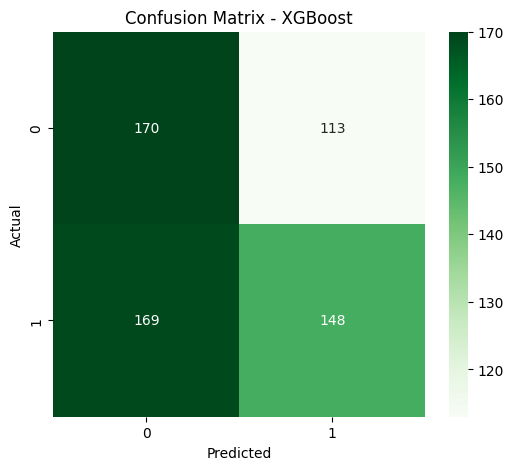

Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.50      0.60      0.55       283
           1       0.57      0.47      0.51       317

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.54      0.53      0.53       600



<Figure size 800x600 with 0 Axes>

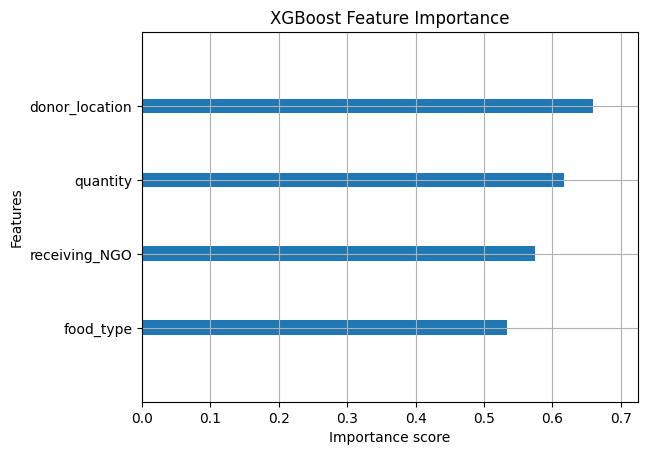

/tmp/ipython-input-3578954787.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


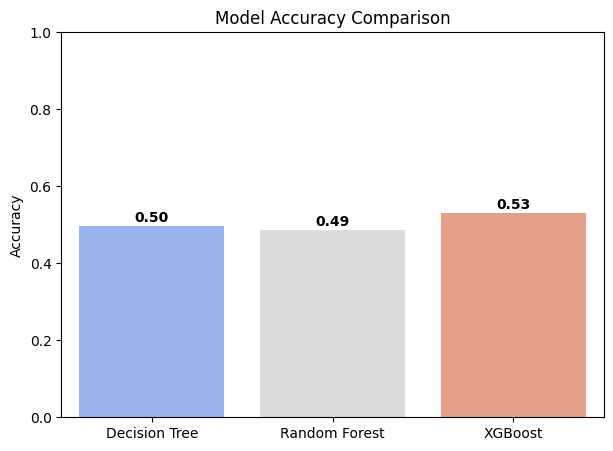

In [ ]:
# ---------------- IMPORT ALL LIBRARIES ----------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# ---------------- UPLOAD DATASET ----------------
print("Please upload your Excel file")
uploaded = files.upload()

# Load the uploaded Excel file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
print("Dataset Loaded Successfully!\n")

# ---------------- DATA PREPROCESSING ----------------
df = df.fillna("Unknown")
print("Data Preview:")
print(df.head())

# Encode categorical columns
le = LabelEncoder()
for col in ['food_type', 'donor_location', 'receiving_NGO', 'delivery_status']:
    df[col] = le.fit_transform(df[col])

# ---------------- DEFINE FEATURES & TARGET ----------------
X = df[['food_type', 'quantity', 'donor_location', 'receiving_NGO']]
y = df['delivery_status']

# ---------------- SPLIT DATA ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------- DECISION TREE MODEL ----------------
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    feature_names=['food_type', 'quantity', 'donor_location', 'receiving_NGO'],
    class_names=['Failed', 'Delivered'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# ---------------- RANDOM FOREST MODEL ----------------
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# ---------------- XGBOOST MODEL ----------------
xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=8, learning_rate=0.1, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# ---------------- MODEL COMPARISON ----------------
print("\n Model Comparison:")
print(f"Decision Tree Accuracy: {acc_dt:.3f}")
print(f"Random Forest Accuracy: {acc_rf:.3f}")
print(f"XGBoost Accuracy: {acc_xgb:.3f}")

# Identify best model
best_name, best_pred = max(
    [('Decision Tree', y_pred_dt, acc_dt),
     ('Random Forest', y_pred_rf, acc_rf),
     ('XGBoost', y_pred_xgb, acc_xgb)],
    key=lambda x: x[2]
)[:2]

print(f"\n Best Model: {best_name}\n")

# ---------------- CONFUSION MATRIX ----------------
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix - {best_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------- CLASSIFICATION REPORT ----------------
print(f"Classification Report for {best_name}")
print(classification_report(y_test, best_pred))

# ---------------- XGBOOST FEATURE IMPORTANCE ----------------
plt.figure(figsize=(8,6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title('XGBoost Feature Importance')
plt.show()

# ---------------- ACCURACY COMPARISON GRAPH ----------------
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [acc_dt, acc_rf, acc_xgb]

plt.figure(figsize=(7,5))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()
